# **INTEGRANTES - GRUPO LEADTECH**

- Bianca Leticia Roman Caldeira - RM: 552267 - Turma: 2TDSPH
- Charlene Aparecida Estevam Mendes Fialho - RM: 552252 - Turma: 2TDSPH
- Lais Alves da Silva Cruz - RM: 552258 - Turma: 2TDSPH
- Fabricio Torres Antonio - RM: 97916 - Turma: 2TDSPH


# **Análise de Crédito - Resolução**

> Utilização de deep analytics e machine learning para solução de um problema.

### ***Descrição :***
Neste notebook, apresentamos uma análise abrangente sobre os desafios enfrentados pela ABX Tecnologia no processo de análise de crédito de seus clientes. Abordamos questões como padronização da análise de crédito, classificação automática de clientes e automação da recomendação de crédito. Utilizamos técnicas de deep analytics e modelos de machine learning para propor soluções eficazes que visam melhorar a eficiência e a precisão da análise de crédito. Este notebook oferece insights valiosos e soluções práticas para aprimorar o processo de tomada de decisão da ABX Tecnologia no que diz respeito à concessão de crédito.

### ***Objetivos :***
1. Padronização da Análise de Crédito.
2. Classificação Automática de Clientes.
3. Automação da Recomendação de Crédito.

## ***Importação das bibliotecas***
Nesta seção, importamos as bibliotecas Python necessárias para realizar a análise.

In [2604]:
# Importando a biblioteca pandas para manipulação e análise de dados
import pandas as pd

# Importando a biblioteca numpy para operações numéricas
import numpy as np

# Importando a biblioteca matplotlib.pyplot para visualização de gráficos
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn para visualização estatística e aprimoramento dos gráficos
import seaborn as sns

# Importando a biblioteca MinMaxScaler do sklearn.preprocessing para escalonamento de dados
from sklearn.preprocessing import MinMaxScaler

# Importando a biblioteca LabelEncoder do sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder


## ***Carregamento dos Dados***

Nesta seção, carregamos os dados fornecidos.

In [2605]:
# Adicionando url do dataset
url = '../dataset/solicitacoescredito.csv'

# Carregando o conjunto de dados do arquivo CSV para um DataFrame
df = pd.read_csv(url)

In [2606]:
# Visualize as primeiras linhas do dataset
df.head()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
0,1,James Richardson-Patel,Alexandra Williams,KEBE17609492220843,0,0.252448,0.0,2015-12-10T00:00:00,0,0.00,...,12.0,0.0,2003.0,Acima de 17 anos,90000.0,False,True,1.0,43200.0,2020-02-03T20:57:33
1,2,Dr. Geoffrey Walsh,Mr. Darren Arnold,JRBK88908250677300,0,0.000000,NaN,2019-06-12T17:28:31,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
2,3,Joanna Hudson,Dr. David Rees,GCVQ28531614261293,4,0.624777,0.0,2019-11-27T00:00:00,0,0.00,...,7.0,0.0,2014.0,De 6 a 10 anos,20000.0,False,True,1.0,4320.0,2020-02-04T16:40:49
3,4,Gordon Jones-Hopkins,Sara Reid-Robson,KJND32266018316396,20,0.000000,NaN,2017-02-13T17:20:27,0,0.00,...,12.0,0.0,2013.0,De 6 a 10 anos,30000.0,False,True,0.0,5920.0,2020-02-04T16:37:52
4,5,Nigel Lee,Dr. Stanley Duncan,CGQN15826802440348,20,0.454088,0.0,2010-07-13T00:00:00,20,1486.95,...,9.0,40680051.0,2002.0,Acima de 17 anos,75000.0,False,False,1.0,89000.0,2020-02-04T15:06:28


## ***Preparação e Análise Exploratória dos Dados***

Nesta seção, realizamos as etapas iniciais de preparação dos dados, incluindo a limpeza, transformação e análise exploratória.

###   Visualização de Estrutura e Distribuição

Neste tópico, examinamos a estrutura dos dados e a distribuição de suas características principais.

In [2607]:
# Visualizando ultimas linhas
df.tail()

,numero_solicitacao,razaoSocial,nomeFantasia,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,...,periodoDemonstrativoEmMeses,custos,anoFundacao,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,dataAprovadoNivelAnalista
8968,9041,Leah Williams,Georgia Booth,YKGZ02907098931653,149,0.306580,0.0,2006-04-26T00:00:00,59,599964.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.990876,NaN,NaN
8969,9042,Mr. Jordan Stevens,Miss Ellie Kelly,UCBM91111020900951,23,0.329796,0.0,2016-08-03T00:00:00,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958869,NaN,NaN
8970,9043,Mr. Barry Wells,Danielle Hudson,CLDB61185288622179,3,0.383919,0.0,2018-10-25T00:00:00,4,2933.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
8971,9044,Keith Jones,Steven Kennedy-Jones,BRJP37453437154592,11,0.424099,0.0,2011-08-10T00:00:00,31,559679.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.994786,NaN,NaN
8972,9045,Cheryl Johnson,Chelsea Kay-Sinclair,COZD54939108010752,4,0.365041,0.0,2009-05-27T00:00:00,56,13640.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [2608]:
# Vendo types
df.dtypes

numero_solicitacao               int64
razaoSocial                     object
nomeFantasia                    object
cnpjSemTraco                    object
maiorAtraso                      int64
margemBrutaAcumulada           float64
percentualProtestos            float64
primeiraCompra                  object
prazoMedioRecebimentoVendas      int64
titulosEmAberto                float64
valorSolicitado                float64
status                          object
definicaoRisco                  object
diferencaPercentualRisco       float64
percentualRisco                float64
dashboardCorrelacao            float64
valorAprovado                  float64
dataAprovadoEmComite            object
periodoBalanco                  object
ativoCirculante                float64
passivoCirculante              float64
totalAtivo                     float64
totalPatrimonioLiquido         float64
endividamento                  float64
duplicatasAReceber             float64
estoque                  

In [2609]:
# Vendo tamanho
print(f"Linhas: {df.shape[0]} e Colunas: {df.shape[1]}")

Linhas: 8973 e Colunas: 38


In [2610]:
# Total de elementos que contem no dataset
print("Número total de elementos:", df.size)


Número total de elementos: 340974


In [2611]:
# Vendo informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8973 entries, 0 to 8972
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   numero_solicitacao           8973 non-null   int64  
 1   razaoSocial                  8973 non-null   object 
 2   nomeFantasia                 8973 non-null   object 
 3   cnpjSemTraco                 8973 non-null   object 
 4   maiorAtraso                  8973 non-null   int64  
 5   margemBrutaAcumulada         8973 non-null   float64
 6   percentualProtestos          7475 non-null   float64
 7   primeiraCompra               8867 non-null   object 
 8   prazoMedioRecebimentoVendas  8973 non-null   int64  
 9   titulosEmAberto              8973 non-null   float64
 10  valorSolicitado              8973 non-null   float64
 11  status                       8973 non-null   object 
 12  definicaoRisco               8973 non-null   object 
 13  diferencaPercentua

In [2612]:
# Vendo dados descritivos
df.describe()

,numero_solicitacao,maiorAtraso,margemBrutaAcumulada,percentualProtestos,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,diferencaPercentualRisco,percentualRisco,dashboardCorrelacao,...,duplicatasAReceber,estoque,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,anoFundacao,capitalSocial,scorePontualidade,limiteEmpresaAnaliseCredito
count,8973.000000,8973.000000,8973.000000,7475.000000,8973.000000,8.973000e+03,8.973000e+03,8973.000000,8973.000000,8973.000000,...,4.733000e+03,4.733000e+03,8.223000e+03,8.223000e+03,8223.000000,8.223000e+03,8228.000000,8.228000e+03,8973.000000,8.228000e+03
mean,4550.042015,24.642594,0.362176,0.019260,23.083027,6.487101e+04,7.492436e+05,0.750321,0.249679,0.047236,...,1.663397e+07,1.523956e+07,5.597420e+07,1.620988e+07,10.377356,2.839061e+07,2006.027467,1.121453e+07,0.798346,2.851017e+06
std,2603.485853,66.180793,0.201455,0.593579,68.177649,2.482852e+05,2.261875e+07,0.146058,0.146058,0.472476,...,2.979029e+08,8.383792e+07,3.344357e+08,1.163482e+08,3.220965,2.072148e+08,19.424120,9.742853e+07,0.379186,2.672324e+07
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+02,0.207547,0.000000,-0.999990,...,-2.278071e+07,-2.632260e+05,0.000000e+00,-6.148721e+08,1.000000,-3.466338e+08,1000.000000,0.000000e+00,0.000000,0.000000e+00
25%,2316.000000,3.000000,0.281395,0.000000,0.000000,0.000000e+00,2.500000e+04,0.642857,0.142857,0.000000,...,3.920500e+04,1.712860e+05,1.191995e+06,0.000000e+00,11.000000,0.000000e+00,2000.000000,5.000000e+04,0.887479,7.360000e+03
50%,4559.000000,6.000000,0.402895,0.000000,0.000000,0.000000e+00,5.000000e+04,0.750000,0.250000,0.000000,...,1.088164e+06,1.063783e+06,3.599483e+06,0.000000e+00,12.000000,0.000000e+00,2009.000000,1.000000e+05,1.000000,4.860000e+04
75%,6802.000000,22.000000,0.507860,0.000000,30.000000,1.725000e+04,1.200000e+05,0.857143,0.357143,0.000000,...,6.576243e+06,5.493839e+06,1.584222e+07,3.357474e+06,12.000000,4.520907e+06,2015.000000,5.000000e+05,1.000000,3.450000e+05
max,9045.000000,1265.000000,1.000000,36.983728,1605.000000,3.938590e+06,1.500000e+09,1.000000,0.792453,0.999990,...,2.009358e+10,1.293428e+09,6.426115e+09,3.366843e+09,12.000000,4.393536e+09,2020.000000,4.100000e+09,1.000000,1.974261e+09


In [2613]:
# Verificar a contagem de valores únicos em cada coluna
df.nunique()


numero_solicitacao             8973
razaoSocial                    2759
nomeFantasia                   2677
cnpjSemTraco                   2829
maiorAtraso                     175
margemBrutaAcumulada           2145
percentualProtestos              10
primeiraCompra                 1950
prazoMedioRecebimentoVendas     180
titulosEmAberto                 761
valorSolicitado                 363
status                            7
definicaoRisco                    4
diferencaPercentualRisco         79
percentualRisco                  81
dashboardCorrelacao             701
valorAprovado                   326
dataAprovadoEmComite            558
periodoBalanco                  124
ativoCirculante                1794
passivoCirculante              1789
totalAtivo                     1788
totalPatrimonioLiquido         1759
endividamento                  1185
duplicatasAReceber             1668
estoque                        1674
faturamentoBruto               4288
margemBruta                 

In [2614]:
# Verificar contagem de elementos não nulos em cada coluna
print(df.count())

numero_solicitacao             8973
razaoSocial                    8973
nomeFantasia                   8973
cnpjSemTraco                   8973
maiorAtraso                    8973
margemBrutaAcumulada           8973
percentualProtestos            7475
primeiraCompra                 8867
prazoMedioRecebimentoVendas    8973
titulosEmAberto                8973
valorSolicitado                8973
status                         8973
definicaoRisco                 8973
diferencaPercentualRisco       8973
percentualRisco                8973
dashboardCorrelacao            8973
valorAprovado                  7569
dataAprovadoEmComite            558
periodoBalanco                 4733
ativoCirculante                4733
passivoCirculante              4733
totalAtivo                     4733
totalPatrimonioLiquido         4733
endividamento                  4733
duplicatasAReceber             4733
estoque                        4733
faturamentoBruto               8223
margemBruta                 

In [2615]:
# Verificar valores ausentes
valores_ausentes = df.isna().sum()
print("Valores ausentes por coluna:")
print(valores_ausentes)

Valores ausentes por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750

In [2616]:
# Verificar valores nulos
valores_nulos = df.isnull().sum()
print("Valores nulos por coluna:")
print(valores_nulos)

Valores nulos por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                       0
margemBrutaAcumulada              0
percentualProtestos            1498
primeiraCompra                  106
prazoMedioRecebimentoVendas       0
titulosEmAberto                   0
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                   0
dashboardCorrelacao               0
valorAprovado                  1404
dataAprovadoEmComite           8415
periodoBalanco                 4240
ativoCirculante                4240
passivoCirculante              4240
totalAtivo                     4240
totalPatrimonioLiquido         4240
endividamento                  4240
duplicatasAReceber             4240
estoque                        4240
faturamentoBruto                750
ma

In [2617]:
# Verificar valores iguais a zero
valores_zero = (df == 0).sum()
print("\nValores iguais a zero por coluna:")
print(valores_zero)


Valores iguais a zero por coluna:
numero_solicitacao                0
razaoSocial                       0
nomeFantasia                      0
cnpjSemTraco                      0
maiorAtraso                    1756
margemBrutaAcumulada           1577
percentualProtestos            7452
primeiraCompra                    0
prazoMedioRecebimentoVendas    5536
titulosEmAberto                5042
valorSolicitado                   0
status                            0
definicaoRisco                    0
diferencaPercentualRisco          0
percentualRisco                 761
dashboardCorrelacao            5587
valorAprovado                     4
dataAprovadoEmComite              0
periodoBalanco                    0
ativoCirculante                 554
passivoCirculante               591
totalAtivo                      557
totalPatrimonioLiquido          590
endividamento                  2381
duplicatasAReceber             1029
estoque                         763
faturamentoBruto             

In [2618]:
df['valorAprovado']

0       50000.0
1           NaN
2       20000.0
3       15000.0
4       50000.0
         ...   
8968        NaN
8969        NaN
8970        NaN
8971        NaN
8972        NaN
Name: valorAprovado, Length: 8973, dtype: float64

### *Pré-processamento dos Dados*

Realizamos as etapas de pré-processamento necessárias para preparar os dados para modelagem, incluindo tratamento de valores ausentes, codificação de variáveis categóricas, normalização ou padronização de variáveis numéricas, entre outros.

In [2619]:
# dropando colunas desnecessárias presentes no dataset
sub_df = df.drop(['numero_solicitacao', 'razaoSocial', 'nomeFantasia', 'diferencaPercentualRisco', 'dashboardCorrelacao', 'dataAprovadoEmComite', 'dataAprovadoNivelAnalista', 'periodoBalanco', 'anoFundacao'], axis=1)

In [2620]:
# Substituir NaN por 0 na coluna 'valorAprovado'
sub_df['valorAprovado'] = sub_df['valorAprovado'].fillna(0)

In [2621]:
# Gera dados faltante no dataset
for col in sub_df.columns[:-1]:
    sub_df.loc[np.random.choice(sub_df.index, 5), col] = np.nan

In [2622]:
# Definir opção para evitar avisos sobre downcasting
pd.set_option('future.no_silent_downcasting', True)

# Tratamento de valores nulos
sub_df.fillna(sub_df.mode().iloc[0], inplace=True)

In [2623]:
# trocando o valor da coluna primeiraCompra para apenas o ano da primeira compra
sub_df['primeiraCompra'] = pd.to_datetime(sub_df['primeiraCompra'], errors='coerce').dt.year

In [2624]:
# Calcular a moda da coluna 'primeiraCompra'
moda_primeira_compra = sub_df['primeiraCompra'].mode()[0]

sub_df['primeiraCompra'] = sub_df['primeiraCompra'].fillna(moda_primeira_compra)



Valor da linha específica com o índice 2375 (após substituição dos valores NaN): 2019.0


In [2627]:
sub_df

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,faturamentoBruto,margemBruta,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,1766880.0,0.0,12.0,0.0,Acima de 17 anos,90000.0,False,True,1.000000,43200.0
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,De 0 a 10 % - Muito Baixo,...,0.0,0.0,12.0,0.0,Acima de 17 anos,100000.0,False,False,0.000000,0.0
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,2814940.0,0.0,7.0,0.0,De 6 a 10 anos,20000.0,False,True,1.000000,4320.0
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,De 51 a 80 % - Alto,...,1285274.0,0.0,12.0,0.0,De 6 a 10 anos,30000.0,False,True,0.000000,5920.0
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,De 11 a 30 % - Baixo,...,40779757.0,81459809.0,9.0,40680051.0,Acima de 17 anos,75000.0,False,False,1.000000,89000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,YKGZ02907098931653,149.0,0.306580,0.0,2006.0,59.0,599964.04,900000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,...,0.0,0.0,12.0,0.0,Acima de 17 anos,100000.0,False,False,0.990876,0.0
8969,UCBM91111020900951,23.0,0.329796,0.0,2016.0,0.0,0.00,150000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,...,0.0,0.0,12.0,0.0,Acima de 17 anos,100000.0,False,False,0.958869,0.0
8970,CLDB61185288622179,3.0,0.383919,0.0,2018.0,4.0,2933.38,150000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,...,0.0,0.0,12.0,0.0,Acima de 17 anos,100000.0,False,False,1.000000,0.0
8971,BRJP37453437154592,11.0,0.424099,0.0,2011.0,31.0,559679.98,1290000.0,EmAnaliseDocumentacao,De 0 a 10 % - Muito Baixo,...,0.0,0.0,12.0,0.0,Acima de 17 anos,100000.0,False,False,0.994786,0.0


In [2628]:
sub_df.isnull().sum()

cnpjSemTraco                   0
maiorAtraso                    0
margemBrutaAcumulada           0
percentualProtestos            0
primeiraCompra                 0
prazoMedioRecebimentoVendas    0
titulosEmAberto                0
valorSolicitado                0
status                         0
definicaoRisco                 0
percentualRisco                0
valorAprovado                  0
ativoCirculante                0
passivoCirculante              0
totalAtivo                     0
totalPatrimonioLiquido         0
endividamento                  0
duplicatasAReceber             0
estoque                        0
faturamentoBruto               0
margemBruta                    0
periodoDemonstrativoEmMeses    0
custos                         0
intervaloFundacao              0
capitalSocial                  0
restricoes                     0
empresa_MeEppMei               0
scorePontualidade              0
limiteEmpresaAnaliseCredito    0
dtype: int64

In [2629]:
# Convertendo os valores booleanos para números (1 para True, 0 para False)
sub_df['restricoes'] = sub_df['restricoes'].astype(float)

In [2630]:
# trocando a coluna intervaloFundacao para valores de 0 a 6 de acordo com seu valor
definindo = {
    'De 0 a 5 anos': 0.0,
    'De 6 a 10 anos': 1.0,
    'De 11 a 16 anos': 2.0,
    'Acima de 17 anos': 3.0,
}

# Aplicar o mapeamento à coluna 'intervaloFundacao'
sub_df['intervaloFundacao'] = sub_df['intervaloFundacao'].replace(definindo)

sub_df['intervaloFundacao'] = sub_df['intervaloFundacao'].astype(float)

# Exibir os valores únicos após a transformação
sub_df['intervaloFundacao'].unique()

array([3., 1., 2., 0.])

In [2631]:
# criando uma nova coluna solicitacao_duplas para verificar se o cnpj aparece mais de uma vez no dataset
sub_df['solicitacao_duplas'] = sub_df.duplicated(subset=['cnpjSemTraco'], keep=False)

# Convertendo os valores booleanos para números (1 para True, 0 para False)
sub_df['solicitacao_duplas'] = sub_df['solicitacao_duplas'].astype(float)

In [2632]:
# Cria um dicionário para mapear faixas de porcentagem para categorias mais amplas
mapeamento = {
    'De 0 a 10 % - Muito Baixo': 'Muito Baixo',
    'De 11 a 30 % - Baixo': 'Baixo',
    'De 31 a 50 % - Médio': 'Médio',
    'De 51 a 80 % - Alto': 'Alto'
}

# Aplica o mapeamento à coluna 'definicaoRisco' 
sub_df['definicaoRisco'] = sub_df['definicaoRisco'].map(mapeamento)

# Exibe os valores únicos na nova coluna 'risco_ampliado'
print(sub_df['definicaoRisco'].unique())


['Baixo' 'Muito Baixo' 'Alto' 'Médio']


In [2633]:
# Cria um dicionário para mapear faixas de porcentagem para categorias mais amplas
mapeamento = {
    'Muito Baixo': 0.0,
    'Baixo': 1.0,
    'Médio': 2.0,
    'Alto': 3.0
}

# Aplica o mapeamento à coluna 'definicaoRisco' 
sub_df['risco_credito'] = sub_df['definicaoRisco'].map(mapeamento).astype(float)

# Exibe os valores únicos na nova coluna 'risco_ampliado'
print(sub_df['risco_credito'].unique())


[1. 0. 3. 2.]


In [2634]:
sub_df.shape

(8973, 31)

In [2635]:
sub_df.head(20)

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,periodoDemonstrativoEmMeses,custos,intervaloFundacao,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacao_duplas,risco_credito
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,Baixo,...,12.0,0.0,3.0,90000.0,0.0,True,1.000000,43200.0,1.0,1.0
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,Muito Baixo,...,12.0,0.0,3.0,100000.0,0.0,False,0.000000,0.0,0.0,0.0
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,Baixo,...,7.0,0.0,1.0,20000.0,0.0,True,1.000000,4320.0,1.0,1.0
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,Alto,...,12.0,0.0,1.0,30000.0,0.0,True,0.000000,5920.0,1.0,3.0
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,Baixo,...,9.0,40680051.0,3.0,75000.0,0.0,False,1.000000,89000.0,1.0,1.0
5,KAYS53232027306925,0.0,0.000000,0.0,2019.0,0.0,0.00,25000.0,AprovadoAnalista,Médio,...,12.0,0.0,1.0,15000.0,0.0,True,0.000000,38400.0,1.0,2.0
6,PYOL43118620147076,16.0,0.000000,0.0,2011.0,0.0,0.00,100000.0,AprovadoAnalista,Médio,...,12.0,156394112.0,3.0,30515674.0,1.0,False,0.000000,18132588.0,1.0,2.0
7,NLUX93496216176463,4.0,0.350175,0.0,2007.0,102.0,208980.00,300000.0,AprovadoAnalista,Muito Baixo,...,9.0,0.0,3.0,120000.0,0.0,False,1.000000,768233.0,1.0,0.0
8,LOVL82962402474134,43.0,0.245818,0.0,2006.0,27.0,6432.00,400000.0,AprovadoAnalista,Baixo,...,12.0,-49267738.0,3.0,1000000.0,0.0,False,1.000000,6910219.0,1.0,1.0
9,NXKJ36775578171965,24.0,0.000012,0.0,2011.0,0.0,22733.33,50000.0,DocumentacaoReprovada,Muito Baixo,...,12.0,0.0,3.0,100000.0,0.0,False,0.831590,0.0,1.0,0.0


In [2636]:
# Selecionar colunas que contêm tipos de dados de string (object)
string_columns = sub_df.select_dtypes(include=['object']).columns
print(string_columns)


Index(['cnpjSemTraco', 'status', 'definicaoRisco', 'empresa_MeEppMei'], dtype='object')


In [2637]:
sub_df[['faturamentoBruto', 'margemBruta', 'totalAtivo']].head(20)

,faturamentoBruto,margemBruta,totalAtivo
0,1766880.0,0.0,0.0
1,0.0,0.0,0.0
2,2814940.0,0.0,0.0
3,1285274.0,0.0,0.0
4,40779757.0,81459809.0,25793410.0
5,918476.0,0.0,0.0
6,239016696.0,-7540544.0,0.0
7,11958227.0,9357949.0,19415777.0
8,72479551.0,6233236.0,39455945.0
9,0.0,0.0,0.0


### *Análise de Agrupamento*

Neste tópico, vamos abordar a análise de agrupamento de variáveis é uma técnica exploratória usada para identificar padrões e relacionamentos entre as variáveis em um conjunto de dados.

In [2638]:
# Definição das faixas para análise de agrupamento
faixas_faturamento = [0, 5000000, 50000000, float('inf')]
faixas_margem_bruta = [0, 0.2, 0.4, 0.6, 0.8, 1, float('inf')]
faixas_ativo_total = [500000, 2000000, 20000000, 200000000, float('inf')]
rotulos_tamanhos = ['Média Empresa', 'Grande Empresa', 'Corporação']

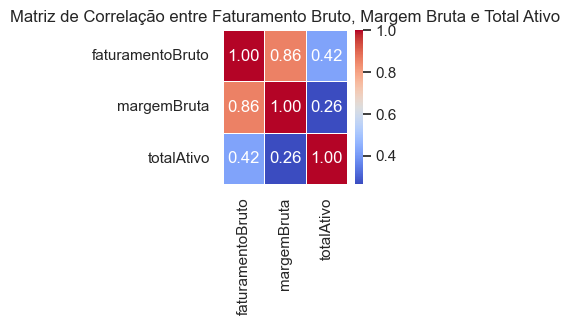

In [2639]:
# Matriz de correlação entre as três colunas
correlation_matrix = sub_df[['faturamentoBruto', 'margemBruta', 'totalAtivo']].corr()

# Plotando o heatmap da matriz de correlação
plt.figure(figsize=(2, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Faturamento Bruto, Margem Bruta e Total Ativo')
plt.show()

> **Conclusões sobre os Pesos**

Ao analisar a correlação entre as três colunas, utilizamos a seguinte fórmula para determinar os pesos de cada atributo:

$$
\text{peso}(\text{atributo}) = \frac{\text{correlacao}(\text{atributo, resultado})}{\sum_{\text{atributo}} \text{correlacao}(\text{atributo, resultado})}
$$

Com base nessa fórmula, chegamos às seguintes conclusões:

- O Faturamento Bruto apresentou a correlação mais forte com o resultado desejado, contribuindo com aproximadamente 46.51% do peso total.
- A Margem Bruta também teve uma correlação significativa com o resultado, contribuindo com cerca de 39.52% do peso total.
- O Total Ativo apresentou a correlação mais fraca entre os atributos, contribuindo com apenas 13.97% do peso total.

Esses pesos refletem a importância relativa de cada atributo com base nas suas correlações com o resultado desejado.


In [2640]:
# Definição dos pesos
# Estes pesos foram calculados a partir das correlações dos atributos com o resultado desejado
# Quanto maior a correlação, maior o peso atribuído ao atributo
pesos = {'faturamentoBruto': 0.4651, 'margemBruta': 0.3952, 'totalAtivo': 0.1397}

# Inicialize o scaler
scaler = MinMaxScaler()

# Ajustando e transformando os dados das 3 colunas
sub_df[['faturamentoBruto', 'margemBruta', 'totalAtivo']]

# Cálculo do score composto ponderado
sub_df['score_ponderado'] = (sub_df['faturamentoBruto'] * pesos['faturamentoBruto'] +
                             sub_df['margemBruta'] * pesos['margemBruta'] +
                             sub_df['totalAtivo'] * pesos['totalAtivo'])

# Ajuste e transforme os dados do score ponderado
sub_df['score_ponderado'] = scaler.fit_transform(sub_df[['score_ponderado']])



In [2641]:
# Adicionando um cálculo em cima do score composto usando uma função logarítmica
# sub_df['score_composto_modificado'] = np.log(sub_df['score_ponderado'] + 1)

# Definição dos Grupos de Tamanho de Empresa com base no score composto ponderado
faixas_score_ponderado = [0, 0.3, 0.6, 1]
rotulos_tamanho_empresa = ['Média Empresa', 'Grande Empresa', 'Corporação']
sub_df['TamanhoEmpresa'] = pd.cut(sub_df['score_ponderado'], bins=faixas_score_ponderado, labels=rotulos_tamanho_empresa, right=False)

In [2642]:
# Criando coluna 'Tamanho da Empresa' com base na flag empresa_MeEppMei e nas faixas de faturamento
sub_df['TamanhoEmpresa'] = np.where(sub_df['empresa_MeEppMei'], 'MEI / ME / EPP', 
                                        pd.cut(sub_df['faturamentoBruto'], bins=faixas_faturamento, 
                                               labels=rotulos_tamanhos, right=False))

In [2643]:
# Mapeamento dos valores de 'status' para valores em float
# Organizei => 0 ao 2 reprovados; 3 e 4 pendente; 5 e 6 Aprovados
status_mapeado = {
    'DocumentacaoReprovada': 'Reprovado', 
    'ReprovadoAnalista': 'Reprovado', 
    'ReprovadoComite': 'Reprovado',
    'AguardandoAprovacao': 'Pendente', 
    'EmAnaliseDocumentacao': 'Pendente', 
    'AprovadoAnalista': 'Aprovado', 
    'AprovadoComite': 'Aprovado', 
}

# Substitui os valores na coluna 'status' pelos valores em float
sub_df['status_credito'] = sub_df['status'].replace(status_mapeado)


# Exibe os valores únicos da coluna 'status_credito' após a substituição
print(sub_df['status_credito'].unique())

['Aprovado' 'Reprovado' 'Pendente']


In [2644]:
# Mapeamento dos valores de 'status' para valores em float
# Organizei => 0 ao 2 reprovados; 3 e 4 pendente; 5 e 6 Aprovados
status_mapeado = {
    'Reprovado': 0.0, 
    'Aprovado': 1.0, 
    'Pendente': 2.0,
}

# Substitui os valores na coluna 'status' pelos valores em float
sub_df['status_credito'] = sub_df['status_credito'].replace(status_mapeado).astype(float)


# Exibe os valores únicos da coluna 'status_credito' após a substituição
print(sub_df['status_credito'].unique())

[1. 0. 2.]


In [2645]:
# Calcular a mediana da coluna 'valorAprovado'
mediana_valor_aprovado = sub_df['valorAprovado'].median()

# Substituir os valores 0.0 na coluna 'valorAprovado' pela moda
sub_df.loc[sub_df['valorAprovado'] == 0.0, 'valorAprovado'] = mediana_valor_aprovado

# Verificar se existem entradas onde o status_credito é igual a 1 e o valorAprovado é igual a 0.0
condicao = (sub_df['status_credito'] == 1.0) & (sub_df['valorAprovado'] == 0.0)
entradas_zero_status_1 = sub_df[condicao]

# Imprimir apenas as colunas 'valorAprovado' e 'status_credito' das entradas filtradas
if not entradas_zero_status_1.empty:
    print("Existem entradas com status_credito igual a 1 e valorAprovado igual a 0.0:")
    print(entradas_zero_status_1[['valorAprovado', 'status_credito']])
else:
    print("Não existem entradas com status_credito igual a 1 e valorAprovado igual a 0.0.")


Não existem entradas com status_credito igual a 1 e valorAprovado igual a 0.0.


In [2646]:
# Verificando as primeiras linhas do DataFrame
sub_df.head(15)

,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,capitalSocial,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacao_duplas,risco_credito,score_ponderado,TamanhoEmpresa,status_credito
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,Baixo,...,90000.0,0.0,True,1.00000,43200.0,1.0,1.0,0.014476,MEI / ME / EPP,1.0
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,Muito Baixo,...,100000.0,0.0,False,0.00000,0.0,0.0,0.0,0.014393,Média Empresa,0.0
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,Baixo,...,20000.0,0.0,True,1.00000,4320.0,1.0,1.0,0.014525,MEI / ME / EPP,1.0
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,Alto,...,30000.0,0.0,True,0.00000,5920.0,1.0,3.0,0.014453,MEI / ME / EPP,1.0
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,Baixo,...,75000.0,0.0,False,1.00000,89000.0,1.0,1.0,0.019937,Grande Empresa,1.0
5,KAYS53232027306925,0.0,0.000000,0.0,2019.0,0.0,0.00,25000.0,AprovadoAnalista,Médio,...,15000.0,0.0,True,0.00000,38400.0,1.0,2.0,0.014436,MEI / ME / EPP,1.0
6,PYOL43118620147076,16.0,0.000000,0.0,2011.0,0.0,0.00,100000.0,AprovadoAnalista,Médio,...,30515674.0,1.0,False,0.00000,18132588.0,1.0,2.0,0.025346,Corporação,1.0
7,NLUX93496216176463,4.0,0.350175,0.0,2007.0,102.0,208980.00,300000.0,AprovadoAnalista,Muito Baixo,...,120000.0,0.0,False,1.00000,768233.0,1.0,0.0,0.015605,Grande Empresa,1.0
8,LOVL82962402474134,43.0,0.245818,0.0,2006.0,27.0,6432.00,400000.0,AprovadoAnalista,Baixo,...,1000000.0,0.0,False,1.00000,6910219.0,1.0,1.0,0.018613,Corporação,1.0
9,NXKJ36775578171965,24.0,0.000012,0.0,2011.0,0.0,22733.33,50000.0,DocumentacaoReprovada,Muito Baixo,...,100000.0,0.0,False,0.83159,0.0,1.0,0.0,0.014393,Média Empresa,0.0


In [2647]:
sub_df['TamanhoEmpresa'].isnull().sum()

0

### *Análise Gráfica - Distribuição de Variáveis*

Neste tópico, vamos explorar a análise gráfica para entender a estrutura e a distribuição dos dados. 
- *Obs. Os gráficos nos ajudam a identificar padrões, tendências e discrepâncias nos dados, fornecendo insights valiosos para análises mais aprofundadas. Vamos examinar os gráficos das variáveis numéricas para compreender melhor seus padrões e comportamentos.*

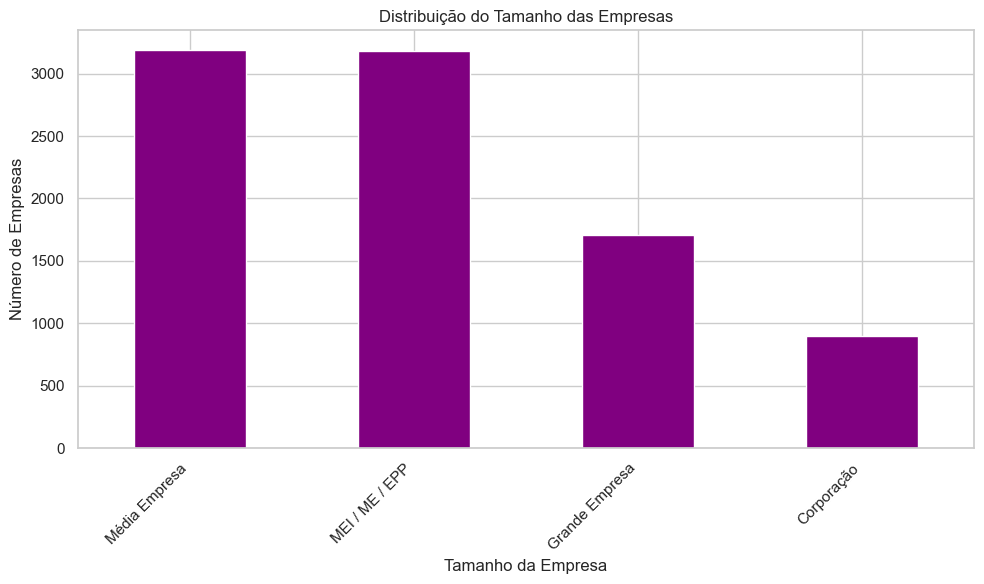

In [2648]:
# Distribuição da quantidade de empresas se baseando no seu tamanho
tamanho_empresas = sub_df['TamanhoEmpresa'].value_counts()

plt.figure(figsize=(10, 6))
tamanho_empresas.plot(kind='bar', color='purple')
plt.title('Distribuição do Tamanho das Empresas')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Empresas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

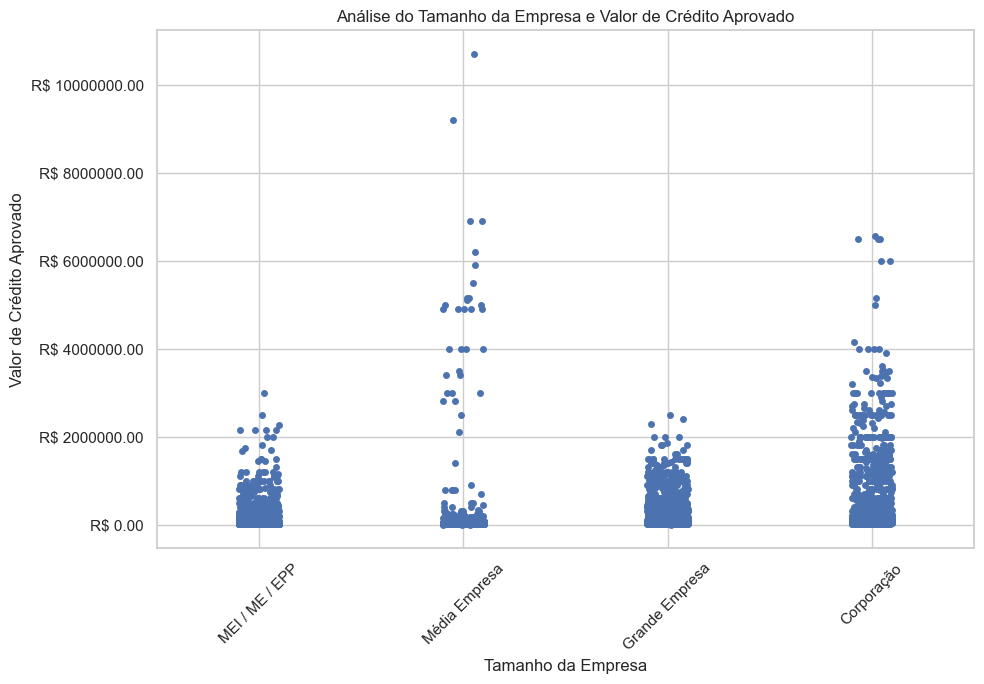

In [2649]:
# Análise do tamanho da empresa e o valor de crédito aprovado
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 7))
sns.stripplot(x='TamanhoEmpresa', y='valorAprovado', data=sub_df, jitter=True)
plt.title('Análise do Tamanho da Empresa e Valor de Crédito Aprovado')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor de Crédito Aprovado')
plt.xticks(rotation=45)
plt.grid(True)

# Formatando os rótulos do eixo y em reais
formatter = ticker.FormatStrFormatter('R$ %.2f')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

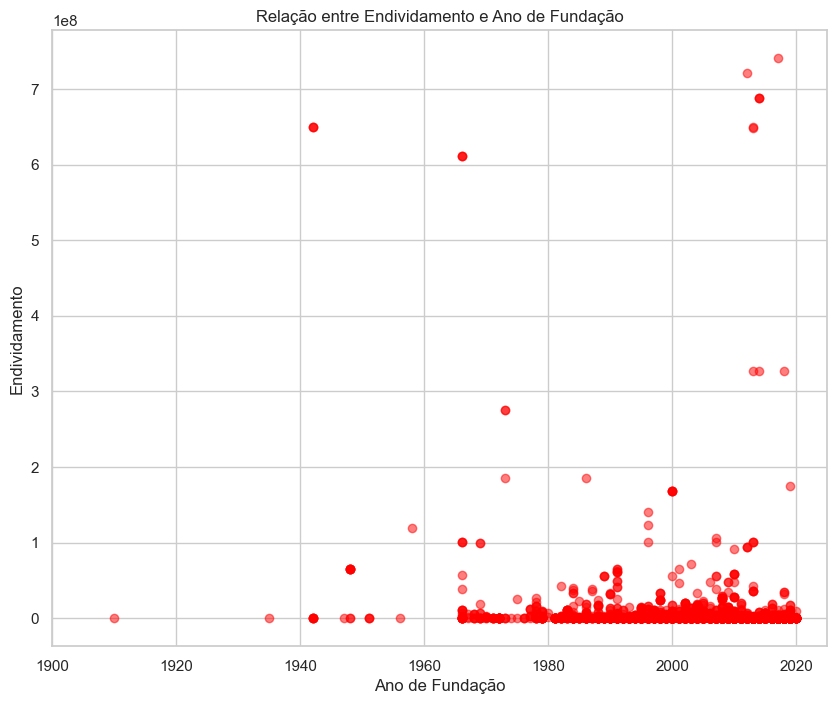

In [2650]:
# endividamento com relação ao ano de fundação da empresa. 
# Isso irá ajudar a identificar se existe alguma relação entre o endividamento e o tempo de existência da empresa.

plt.figure(figsize=(10, 8))
plt.scatter(df['anoFundacao'], df['endividamento'], color='red', alpha=0.5)
plt.title('Relação entre Endividamento e Ano de Fundação')
plt.xlabel('Ano de Fundação')
plt.ylabel('Endividamento')
plt.xlim(1900, 2025) 
plt.grid(True)
plt.show()

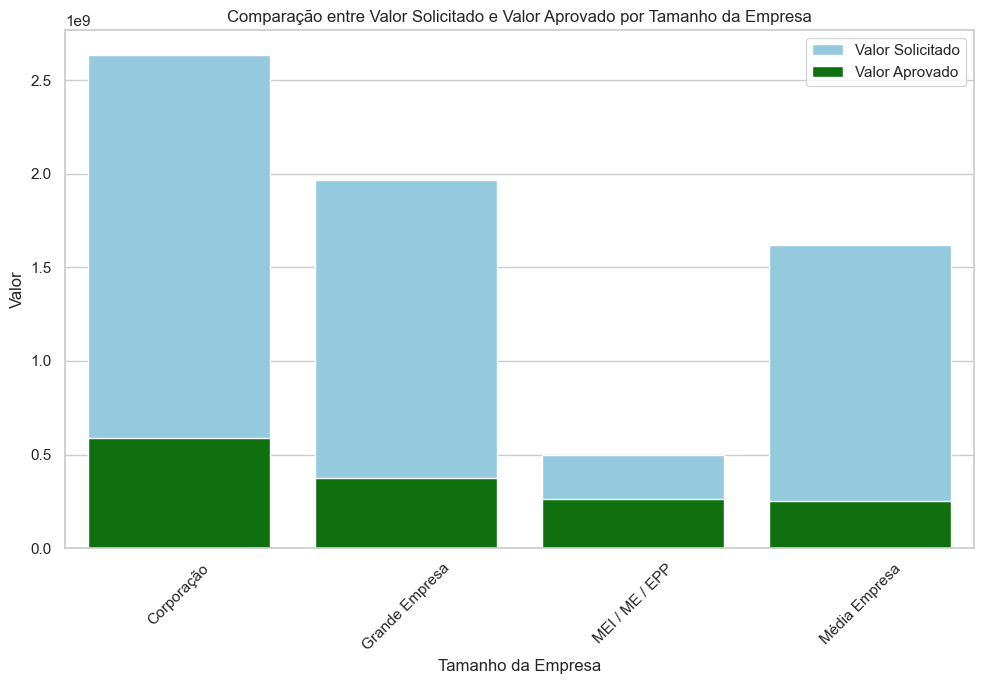

In [2651]:
# valor de crédito solicitado em relação ao valor aprovado

stacked_df = sub_df.groupby('TamanhoEmpresa', observed=False).agg({'valorSolicitado': 'sum', 'valorAprovado': 'sum'}).reset_index()


plt.figure(figsize=(10, 7))

sns.barplot(x='TamanhoEmpresa', y='valorSolicitado', data=stacked_df, color='skyblue', label='Valor Solicitado')
sns.barplot(x='TamanhoEmpresa', y='valorAprovado', data=stacked_df, color='green', label='Valor Aprovado')

plt.title('Comparação entre Valor Solicitado e Valor Aprovado por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

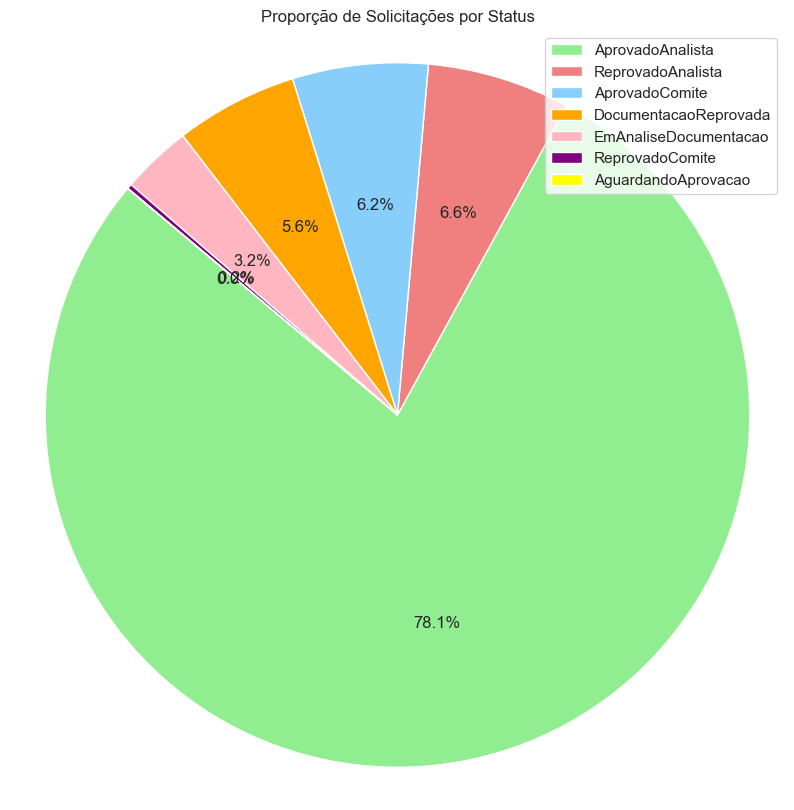

In [2652]:
# proporção de solicitações aprovadas, reprovadas e em espera.

status_counts = sub_df['status'].value_counts()

labels = status_counts.index
sizes = status_counts.values
colors = ['lightgreen', 'lightcoral', 'lightskyblue', 'orange', 'lightpink', 'purple', 'yellow']

plt.figure(figsize=(10, 10))
plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Solicitações por Status')
plt.axis('equal') 
plt.legend(labels, loc='upper right')
plt.show()


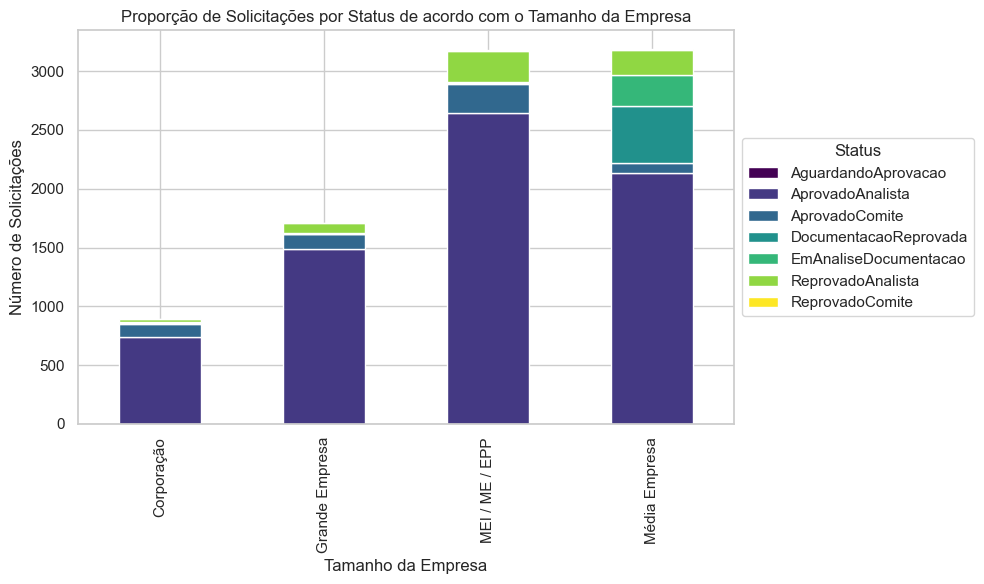

In [2653]:
status_by_size = sub_df.groupby(['TamanhoEmpresa', 'status'], observed=False).size().unstack(fill_value=0)

status_by_size.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='viridis')

sns.set_theme(style="whitegrid")

plt.title('Proporção de Solicitações por Status de acordo com o Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Número de Solicitações')
plt.legend(title='Status', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

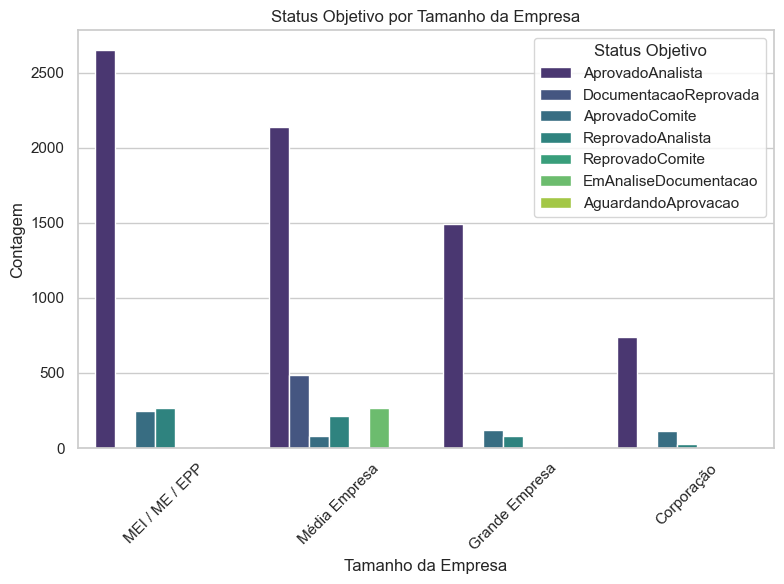

In [2654]:
# Criar um gráfico de barras empilhadas
plt.figure(figsize=(8, 6))
sns.countplot(data=sub_df, x='TamanhoEmpresa', hue='status', palette='viridis')
plt.title('Status Objetivo por Tamanho da Empresa')
plt.xlabel('Tamanho da Empresa')
plt.ylabel('Contagem')
plt.legend(title='Status Objetivo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


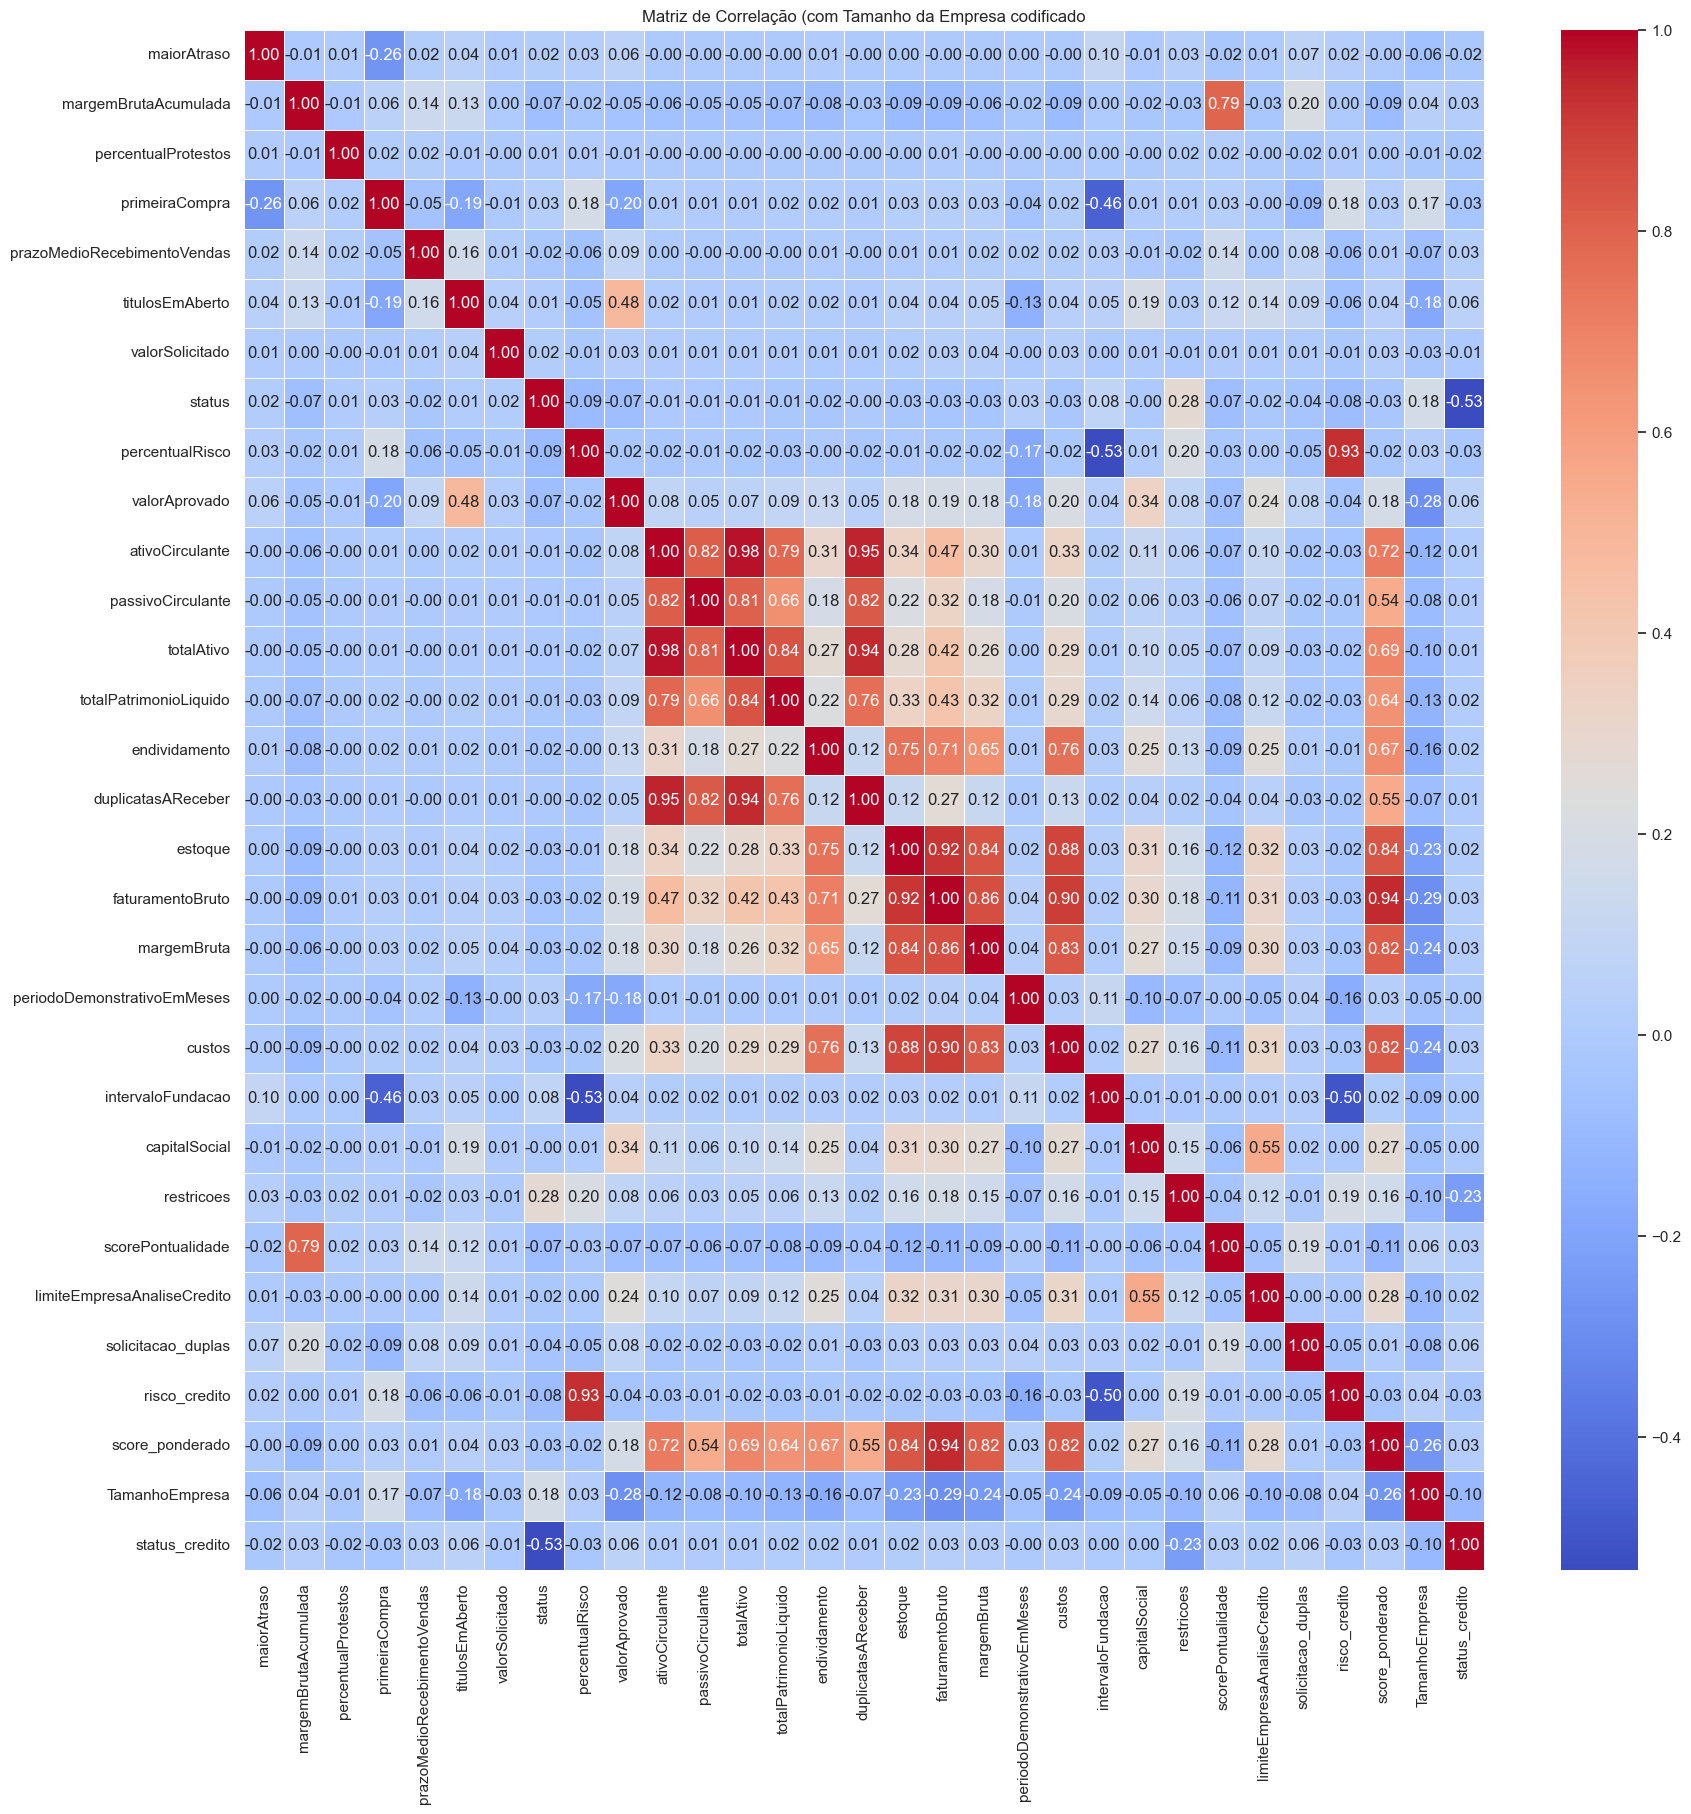

In [2655]:
# Criando uma cópia do DataFrame para evitar modificar o original
encoded_df = sub_df.copy()

# Aplicando Label Encoding na coluna 'Tamanho da Empresa'
label_encoder = LabelEncoder()
encoded_df['TamanhoEmpresa'] = label_encoder.fit_transform(encoded_df['TamanhoEmpresa'])
# status
encoded_df['status'] = label_encoder.fit_transform(encoded_df['status'])

# colunas numéricas
numeric_columns_encoded = encoded_df.select_dtypes(include=np.number)

# Calculando a matriz de correlação
correlation_matrix_encoded = numeric_columns_encoded.corr()

# Visualizar em gráfico matriz de correlação
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (com Tamanho da Empresa codificado')
plt.show()


## ***Modelos de Classificação***

Neste tópico, vamos abordar o treinamento de modelo de classificação, ou seja, um processo que visa prever a qual classe ou categoria uma instância específica pertence com base em suas características.

### *Imports necessários*

In [2656]:
# Importa a classe RandomForestClassifier para classificação RandomForest
from sklearn.ensemble import RandomForestClassifier

# Importa a função train_test_split para dividir os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split

# Importa a função accuracy_score para calcular a acurácia do modelo de classificação
from sklearn.metrics import accuracy_score, classification_report

### *Coletando os dados*

Agora, vamos preparar os dados para treinar nosso modelo de classificação. Aqui, definimos nossas `entradas (X)`, que são as características que usaremos para fazer previsões, e nossa `saída/target (Y)`, que é a classe que queremos prever.

In [2657]:
# Selecionando colunas de entrada e saida
# Atribuindo a coluna 'Tamanho da Empresa' ao Y
Y = sub_df[['definicaoRisco','TamanhoEmpresa' ]]

# Atribuindo as outras colunas ao X
X = sub_df[['margemBrutaAcumulada', 'faturamentoBruto', 'valorAprovado', 'ativoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 'scorePontualidade', 'percentualRisco']]

### *Separação de Treino e Teste*

Nesta etapa, estamos dividindo nossos dados em conjuntos de treinamento e teste. O conjunto de treinamento será usado para treinar nosso modelo, enquanto o conjunto de teste será usado para avaliar o desempenho do modelo em dados não vistos.

- Estamos dividindo os dados de `entrada (X)` e `saída/target (Y)` em conjuntos de `treinamento (80%)` e `teste (20%)`. 
  
- O parâmetro `random_state`  é usado para garantir a reprodutibilidade dos resultados, e ele controla a aleatoriedade da divisão dos dados.
  
- O parâmetro `stratify=Y` mantém a mesma proporção de classes da variável alvo (Y) nos conjuntos de treinamento e teste.

In [2658]:
# Dividindo os dados em conjuntos de treinamento e teste (80% treinamento, 20% teste)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Exibindo o tamanho dos conjuntos de treinamento e teste
print("Tamanho do conjunto de treinamento:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treinamento: (7178, 8)
Tamanho do conjunto de teste: (1795, 8)


### *Treinamento do Modelo*
Aqui, estamos treinando um modelo de classificação utilizando o algoritmo do scikit-learn. O modelo é treinado com os dados de entrada `(X_train)` e os rótulos correspondentes `(Y_train)`. 

- Modelo: RandomForestClassifier
  
  - `Como Funciona:` Ele cria várias árvores de decisão durante o treinamento e combina suas previsões para obter uma decisão final. Cada árvore de decisão é treinada com uma amostra aleatória dos dados de treinamento e utiliza um subconjunto aleatório das características para fazer as divisões nos nós. o final, a previsão final é determinada pela votação das previsões de todas as árvores individuais. 

In [2659]:
# Modelo => RandomForest
# Cria o classificar RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)


# Cria o modelo de machine learning
model.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

### *Predições do modelo*

Nesta etapa, estamos fazendo previsões no conjunto de teste usando o modelo treinado. 

- A função `predict()` do modelo é aplicada aos dados de entrada do conjunto de teste `(X_test)`, resultando em previsões para a classe alvo.
   
- Essas previsões serão posteriormente comparadas com as classes reais para avaliar o desempenho do modelo.

In [2660]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Exibindo previsoes
y_pred

array([['Baixo', 'Média Empresa'],
       ['Médio', 'Grande Empresa'],
       ['Baixo', 'Média Empresa'],
       ...,
       ['Médio', 'MEI / ME / EPP'],
       ['Baixo', 'MEI / ME / EPP'],
       ['Alto', 'MEI / ME / EPP']], dtype=object)

### *Métricas - Acurácia*

Nesta etapa, iremos visualizar a acurácia do nosso modelo.

- `Acurácia` é uma métrica comum usada para avaliar a precisão de um modelo de classificação. Ela representa a proporção de previsões corretas em relação ao total de previsões feitas pelo modelo.

In [2661]:
# Avaliar o modelo
accuracy_risco = accuracy_score(Y_test['definicaoRisco'], y_pred[:, 0])
accuracy_tamanho = accuracy_score(Y_test['TamanhoEmpresa'], y_pred[:, 1])

print(f'Acuracia para DefinicaoRisco: {accuracy_risco}')
print(f'Acuracia para Tamanho da Empresa: {accuracy_tamanho}')

Acuracia para DefinicaoRisco: 0.9966573816155989
Acuracia para Tamanho da Empresa: 0.8891364902506964


In [2662]:
# Relatórios de Classificação
print("Classificação Relatorio para DefinicaoRisco:")
print(classification_report(Y_test['definicaoRisco'], y_pred[:, 0]))

print("Classificação Relatorio para Tamanho da Empresa:")
print(classification_report(Y_test['TamanhoEmpresa'], y_pred[:, 1]))

Classificação Relatorio para DefinicaoRisco:
              precision    recall  f1-score   support

        Alto       0.99      0.97      0.98        78
       Baixo       1.00      1.00      1.00       898
 Muito Baixo       0.99      1.00      1.00       318
       Médio       1.00      1.00      1.00       501

    accuracy                           1.00      1795
   macro avg       0.99      0.99      0.99      1795
weighted avg       1.00      1.00      1.00      1795

Classificação Relatorio para Tamanho da Empresa:
                precision    recall  f1-score   support

    Corporação       0.97      1.00      0.98       180
Grande Empresa       0.91      0.94      0.93       342
MEI / ME / EPP       0.85      0.84      0.84       635
 Média Empresa       0.90      0.88      0.89       638

      accuracy                           0.89      1795
     macro avg       0.91      0.92      0.91      1795
  weighted avg       0.89      0.89      0.89      1795



### *Predições fora das amostras do dataset*

Nesta etapa, estamos utilizando o modelo treinado para fazer previsões com base em valores fictícios fornecidos. 

- São fornecidos valores fictícios, que são inseridos em um DataFrame e, em seguida, o modelo é aplicado a esses dados usando a função `predict()`. 
  
A previsão resultante nos fornece a classe prevista.

In [2663]:
# Valores fictícios para as entradas
dados_valores = {
    'margemBrutaAcumulada': [0.7552448],
    'faturamentoBruto' : [8946880.0],
    'valorAprovado': [50758917.0],
    'ativoCirculante': [0.0],
    'totalAtivo': [1215487.0],
    'totalPatrimonioLiquido': [1000],
    'scorePontualidade': [1.0],
    'percentualRisco' : [0.283019]
}

# Criando DataFrame
valores_df = pd.DataFrame(dados_valores)


In [2664]:
# Faça a previsão usando o modelo
previsao = model.predict(valores_df)

# Exibindo previsão
print("A previsão do DefinicaoRisco é:", previsao[0][0])
print("A previsão do Tamanho da Empresa é:", previsao[0][1])

A previsão do DefinicaoRisco é: Baixo
A previsão do Tamanho da Empresa é: Grande Empresa


## Rede Neural - Previsão de crédito

### Relembrando nossos status de crédito que foram transformados

Durante a etapa de análise de agrupamento, realizamos uma transformação na coluna status, criando uma nova chamada status_credito, representada por valores numéricos em ponto flutuante. Abaixo está a tabela com a correspondência entre os valores originais em string e seus equivalentes em float:

| Valor em String        | Valor em String Amplo |
|------------------------|-----------------------|
| DocumentacaoReprovada  | Reprovado             |
| ReprovadoAnalista      | Reprovado             |
| ReprovadoComite        | Reprovado             |
| AguardandoAprovacao    | Pendente              |
| EmAnaliseDocumentacao  | Pendente              |
| AprovadoAnalista       | Aprovado              |
| AprovadoComite         | Aprovado              |

Depois, transformamos as categorias amplas em valores numéricos para uso em análise quantitativa e modelos de machine learning:

| Valor em String        | Valor Atual em Float |
|------------------------|----------------------|
| Reprovado              | 0.0                  |
| Aprovado               | 1.0                  |
| Pendente               | 2.0                  |



### *Imports Necessários*

In [2665]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

### Verificações iniciais

In [2666]:
# Conta a quantidade de cada valor na coluna 'status_credito'
status_counts = sub_df['status_credito'].value_counts()
status_counts

status_credito
1.0    7570
0.0    1113
2.0     290
Name: count, dtype: int64

In [2667]:
# Vamos remover a classe com apenas um exemplo
df_clean = sub_df[sub_df['status_credito'] != 2.0] #Pendente

### Separação de Treino e Teste da Rede

In [2668]:
# Recriar X e Y com o DataFrame limpo
Y = df_clean['status_credito']
X = df_clean[['margemBrutaAcumulada', 'faturamentoBruto', 'valorAprovado', 'ativoCirculante', 'totalAtivo', 'totalPatrimonioLiquido', 'scorePontualidade', 'percentualRisco']]


In [2669]:
# Dividir os dados em conjuntos de treino e teste com estratificação
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Verificar tamanhos dos conjuntos de dados
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

Tamanho do conjunto de treino: (6946, 8)
Tamanho do conjunto de teste: (1737, 8)


In [2670]:
# Normalizar os dados de entrada
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar tamanhos dos conjuntos de dados depois da normalização
print("Tamanho do conjunto de treino:", X_train_scaled.shape)
print("Tamanho do conjunto de teste:", X_test_scaled.shape)

Tamanho do conjunto de treino: (6946, 8)
Tamanho do conjunto de teste: (1737, 8)


In [2671]:
# Convertendo as saídas para categorias (necessário para a classificação)
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)

### *Criação de Rede Neural*

In [2672]:
# Criando a rede neural
model = Sequential()
model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(170, activation='relu'))
model.add(Dense(87, activation='relu'))
model.add(Dense(45, activation='relu'))
model.add(Dense(Y_train.shape[1], activation='softmax'))

### *Treinamento de Rede Neural*

In [2673]:
# Compilando o modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train_scaled, Y_train, epochs=25, batch_size=10, validation_data=(X_test_scaled, Y_test))

Epoch 1/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8717 - loss: 0.3880 - val_accuracy: 0.9332 - val_loss: 0.2392
Epoch 2/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9152 - loss: 0.2638 - val_accuracy: 0.9326 - val_loss: 0.2185
Epoch 3/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9169 - loss: 0.2544 - val_accuracy: 0.9372 - val_loss: 0.2094
Epoch 4/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9185 - loss: 0.2514 - val_accuracy: 0.9349 - val_loss: 0.2158
Epoch 5/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9154 - loss: 0.2504 - val_accuracy: 0.9361 - val_loss: 0.2098
Epoch 6/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9199 - loss: 0.2413 - val_accuracy: 0.9361 - val_loss: 0.2032
Epoch 7/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9245 - loss: 0.2278 - val_accuracy: 0.9372 - val_loss: 0.2090
Epoch 8/25
695/695 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9186 - loss: 0.2369 - val_accuracy: 0.

### *Gráfico - Loss e Validação*

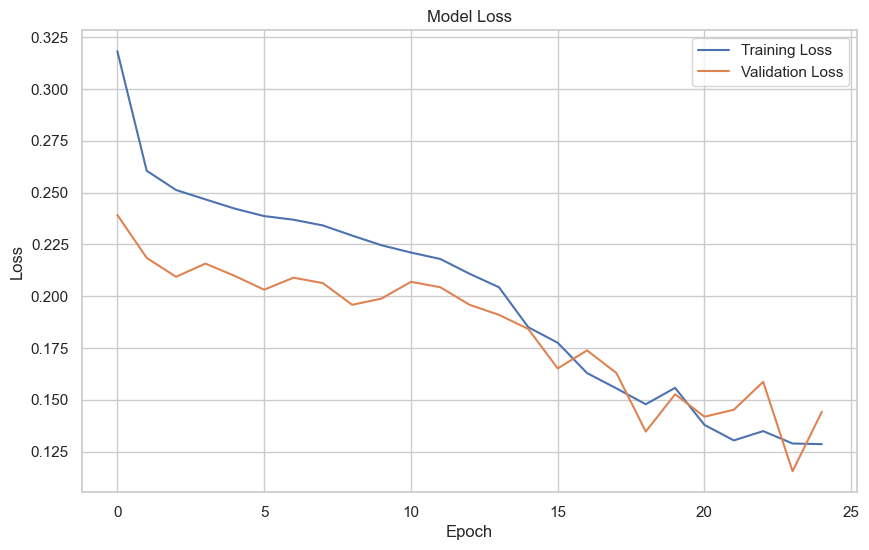

In [2674]:
# Plotar o loss do treinamento e da validação
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

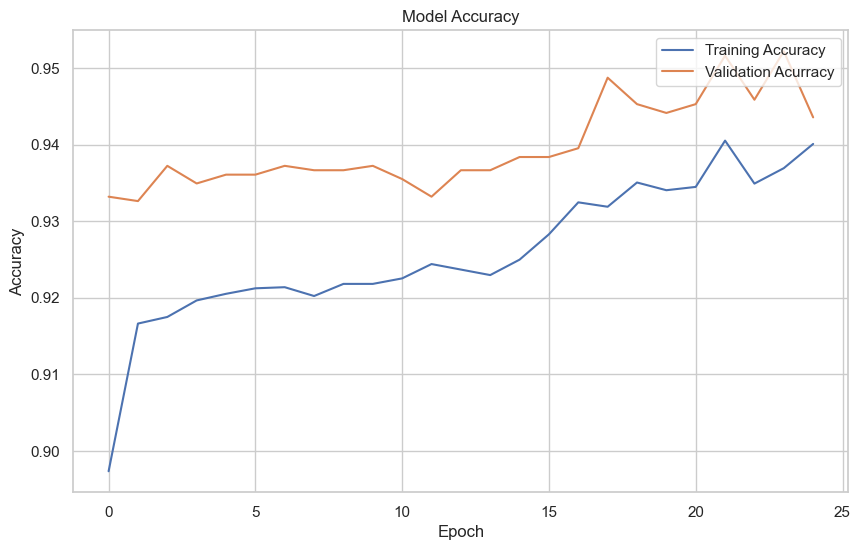

In [2675]:
# Plotar o loss do treinamento e da validação
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Acurracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

### *Métrica - Acurácia da Rede*

In [2676]:
# Avaliando o modelo
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9471 - loss: 0.1243
Acurácia do modelo: 0.94


### *Predições da Rede*

In [2677]:
# Fazendo previsões com a rede neural
predicoes = model.predict(X_test_scaled)

# Convertendo as previsões para classes
predicoes_classes = np.argmax(predicoes, axis=1)
Y_test_classes = np.argmax(Y_test.values, axis=1)

# Exibindo algumas previsões
for i in range(10):
    print(f'Previsto: {predicoes_classes[i]}, Real: {Y_test_classes[i]}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 0
Previsto: 1, Real: 1
Previsto: 1, Real: 1
Previsto: 1, Real: 1


### *Predições fora das amostras*

In [2678]:
# Valores fictícios para as entradas
dados_valores = {
    'margemBrutaAcumulada': [0.7552448],
    'faturamentoBruto' : [8946880.0],
    'valorAprovado': [50758917.0],
    'ativoCirculante': [0.0],
    'totalAtivo': [1215487.0],
    'totalPatrimonioLiquido': [1000],
    'scorePontualidade': [1.0],
    'percentualRisco' : [0.283019]
}

# Criando DataFrame
valores_df = pd.DataFrame(dados_valores)

# Normalizando os novos dados
valores_df_scaled = scaler.transform(valores_df)

In [2679]:
# Fazendo a previsão
previsao = model.predict(valores_df_scaled)
previsao_classe = np.argmax(previsao, axis=1)

# Exibindo a previsão
print(f'A previsão do Status de Crédito é: {previsao_classe[0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
A previsão do Status de Crédito é: 1


In [2680]:
# Mapeamento das classes de volta para strings para ficar mais entendivel
mapeamento_inverso = {
    0.0: 'Reprovado',
    1.0: 'Aprovado',
    2.0: 'Pendente'
}

# Convertendo a previsão para a string correspondente
status_credito_previsao = mapeamento_inverso[previsao_classe[0]]

# Exibindo a previsão
print(f'A previsão do Status de Crédito é: {status_credito_previsao}')

A previsão do Status de Crédito é: Aprovado


In [2681]:
# Definir critérios para recomendação de valor de crédito
limite_score_pontualidade = 0.8  # Limite de score de pontualidade
limite_percentual_risco = 0.3  # Limite de percentual de risco

# Função para recomendar valor de crédito com base nos critérios
def recomendar_valor_credito(row):
    if row['scorePontualidade'] > limite_score_pontualidade \
        and row['percentualRisco'] < limite_percentual_risco:
        # Se o cliente atender aos critérios, recomendar um valor maior
        return row['valorAprovado'] * 1.2  # Por exemplo, aumentar o valor em 20%
    else:
        # Se o cliente não atender aos critérios, manter o valor original
        return row['valorAprovado']

# Aplicar a função de recomendação de valor de crédito ao DataFrame
sub_df['valorRecomendadoCredito'] = sub_df.apply(recomendar_valor_credito, axis=1)

# Exibir o DataFrame com a nova coluna
sub_df


,cnpjSemTraco,maiorAtraso,margemBrutaAcumulada,percentualProtestos,primeiraCompra,prazoMedioRecebimentoVendas,titulosEmAberto,valorSolicitado,status,definicaoRisco,...,restricoes,empresa_MeEppMei,scorePontualidade,limiteEmpresaAnaliseCredito,solicitacao_duplas,risco_credito,score_ponderado,TamanhoEmpresa,status_credito,valorRecomendadoCredito
0,KEBE17609492220843,0.0,0.252448,0.0,2015.0,0.0,0.00,50000.0,AprovadoAnalista,Baixo,...,0.0,True,1.000000,43200.0,1.0,1.0,0.014476,MEI / ME / EPP,1.0,60000.0
1,JRBK88908250677300,0.0,0.000000,0.0,2019.0,0.0,0.00,10000.0,DocumentacaoReprovada,Muito Baixo,...,0.0,False,0.000000,0.0,0.0,0.0,0.014393,Média Empresa,0.0,30000.0
2,GCVQ28531614261293,4.0,0.624777,0.0,2019.0,0.0,0.00,20000.0,AprovadoAnalista,Baixo,...,0.0,True,1.000000,4320.0,1.0,1.0,0.014525,MEI / ME / EPP,1.0,24000.0
3,KJND32266018316396,20.0,0.000000,0.0,2017.0,0.0,0.00,25000.0,AprovadoAnalista,Alto,...,0.0,True,0.000000,5920.0,1.0,3.0,0.014453,MEI / ME / EPP,1.0,15000.0
4,CGQN15826802440348,20.0,0.454088,0.0,2010.0,20.0,1486.95,50000.0,AprovadoAnalista,Baixo,...,0.0,False,1.000000,89000.0,1.0,1.0,0.019937,Grande Empresa,1.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8968,YKGZ02907098931653,149.0,0.306580,0.0,2006.0,59.0,599964.04,900000.0,EmAnaliseDocumentacao,Muito Baixo,...,0.0,False,0.990876,0.0,1.0,0.0,0.014393,Média Empresa,2.0,36000.0
8969,UCBM91111020900951,23.0,0.329796,0.0,2016.0,0.0,0.00,150000.0,EmAnaliseDocumentacao,Muito Baixo,...,0.0,False,0.958869,0.0,1.0,0.0,0.014393,Média Empresa,2.0,36000.0
8970,CLDB61185288622179,3.0,0.383919,0.0,2018.0,4.0,2933.38,150000.0,EmAnaliseDocumentacao,Muito Baixo,...,0.0,False,1.000000,0.0,1.0,0.0,0.014393,Média Empresa,2.0,36000.0
8971,BRJP37453437154592,11.0,0.424099,0.0,2011.0,31.0,559679.98,1290000.0,EmAnaliseDocumentacao,Muito Baixo,...,0.0,False,0.994786,0.0,1.0,0.0,0.014393,Média Empresa,2.0,36000.0
